## Importing Libraries

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [ ]:
df=pd.read_csv("/content/Iris.csv")

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Data Analysis

In [ ]:
df.shape  # shape of the dataset

(150, 6)

The dataset provided has 150 rows.

In [ ]:
df.columns  #All the columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.dtypes  # Checking the datatypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is No Null value.

In [ ]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

1-There are 150 observations with 4 features each (sepalLength, sepalWidth, petalLength, petalWidth).

2-There are no null values.

3-There are 50 observations of each species (Iris-setosa, Iris-versicolor ,Iris-virginica).

In [ ]:
df.drop('Id',axis=1,inplace=True)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.duplicated().any().sum()

1

In [ ]:
# count duplicate rows
duplicate_rows = df.duplicated()
print(duplicate_rows)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


In [ ]:
# count number of duplicate rows
num_duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows: ", num_duplicate_rows)

Number of duplicate rows:  3


In [ ]:
# remove duplicate rows
df_no_duplicates = df.drop_duplicates()
print(df_no_duplicates)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[147 rows x 5 columns]


In [ ]:
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

## **Visualization**

<Axes: xlabel='Species', ylabel='count'>

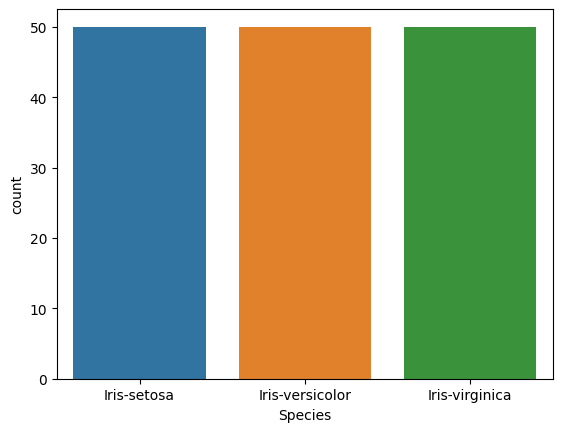

In [ ]:
sns.countplot(df,x="Species")

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

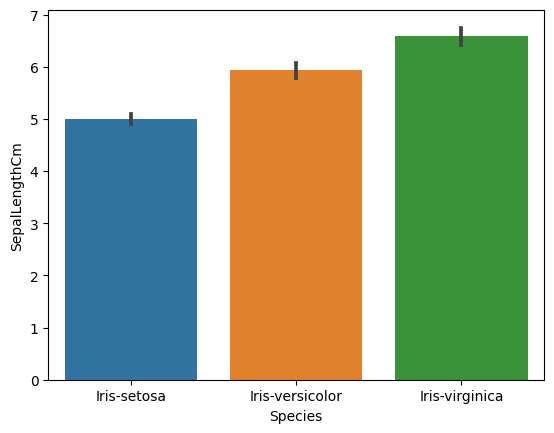

In [ ]:
sns.barplot(df,x="Species",y="SepalLengthCm")

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

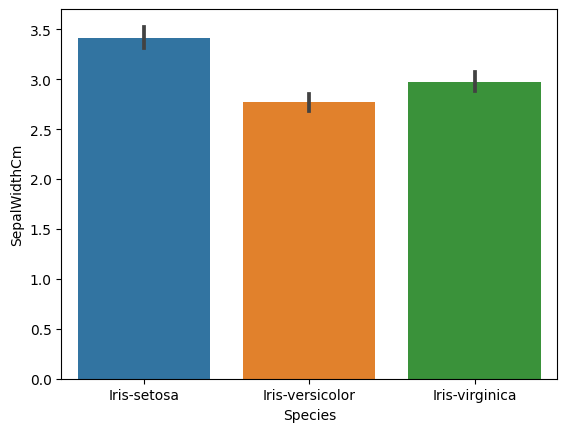

In [ ]:
sns.barplot(df,x="Species",y="SepalWidthCm")

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

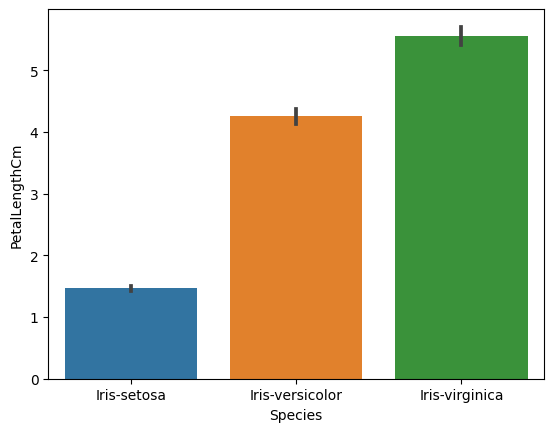

In [ ]:
sns.barplot(df,x="Species",y="PetalLengthCm")

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

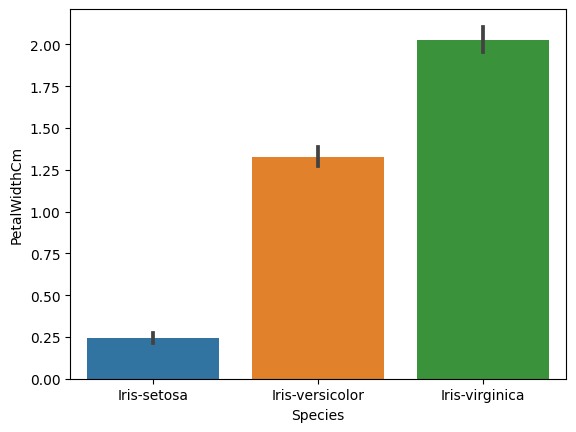

In [ ]:
sns.barplot(df,x="Species",y="PetalWidthCm")

In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<ipython-input-360-57f645f58ec2>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)
<ipython-input-360-57f645f58ec2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(132)


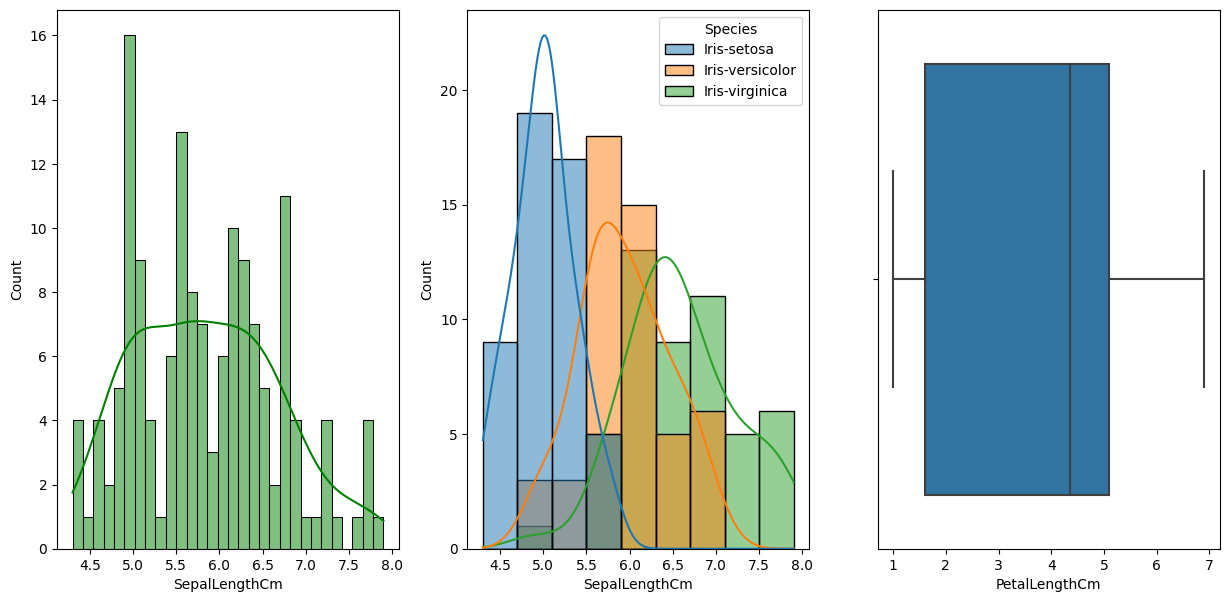

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(131)
sns.histplot(data=df,x='SepalLengthCm',bins=30,kde=True,color='g')
plt.subplot(132)
sns.histplot(data=df,x='SepalLengthCm',kde=True,hue='Species')
plt.subplot(133)
sns.boxplot(data=df,x='PetalLengthCm')
plt.show()


<ipython-input-361-6a230275409c>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)
<ipython-input-361-6a230275409c>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(132)


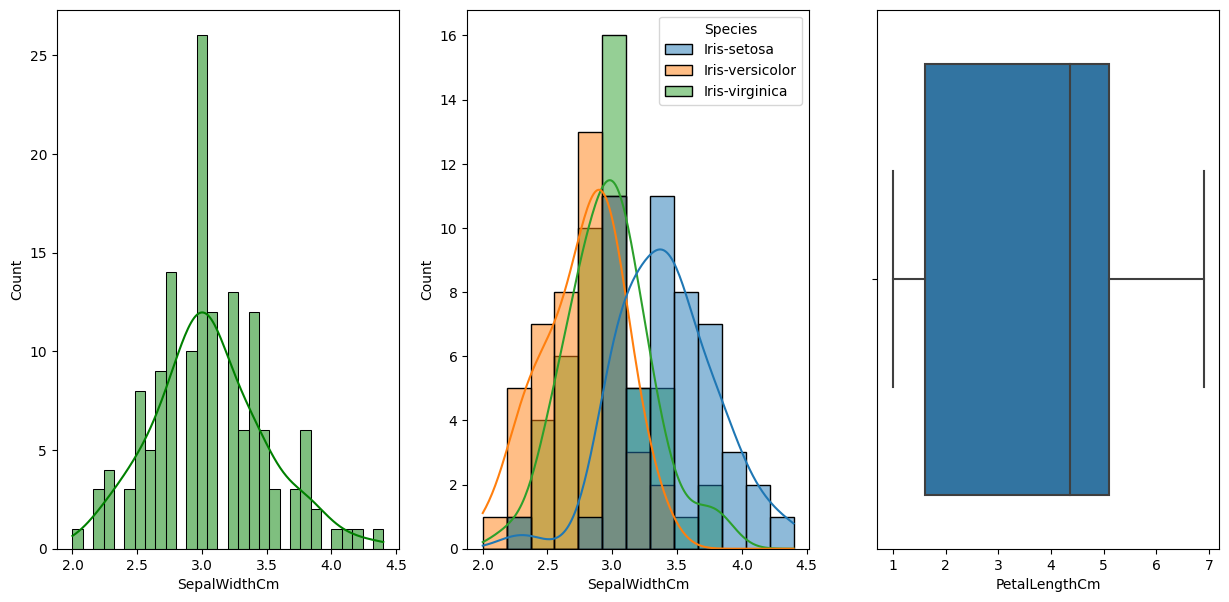

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(131)
sns.histplot(data=df,x='SepalWidthCm',bins=30,kde=True,color='g')
plt.subplot(132)
sns.histplot(data=df,x='SepalWidthCm',kde=True,hue='Species')
plt.subplot(133)
sns.boxplot(data=df,x='PetalLengthCm')
plt.show()

<ipython-input-362-1dc5268223e7>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)
<ipython-input-362-1dc5268223e7>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(132)


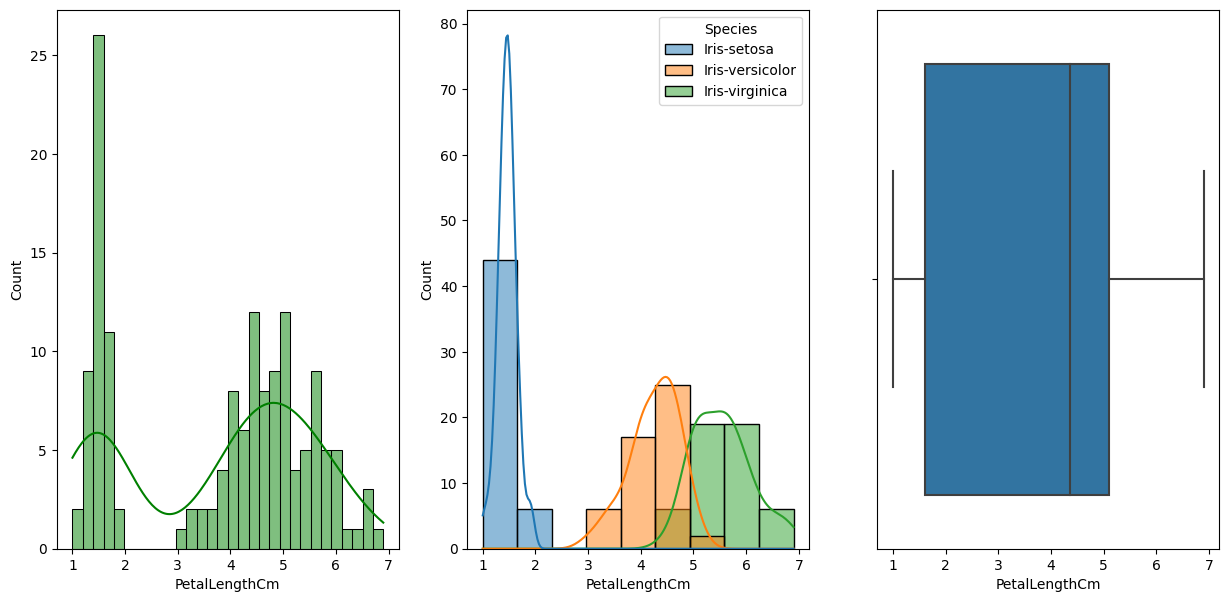

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(131)
sns.histplot(data=df,x='PetalLengthCm',bins=30,kde=True,color='g')
plt.subplot(132)
sns.histplot(data=df,x='PetalLengthCm',kde=True,hue='Species')
plt.subplot(133)
sns.boxplot(data=df,x='PetalLengthCm')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


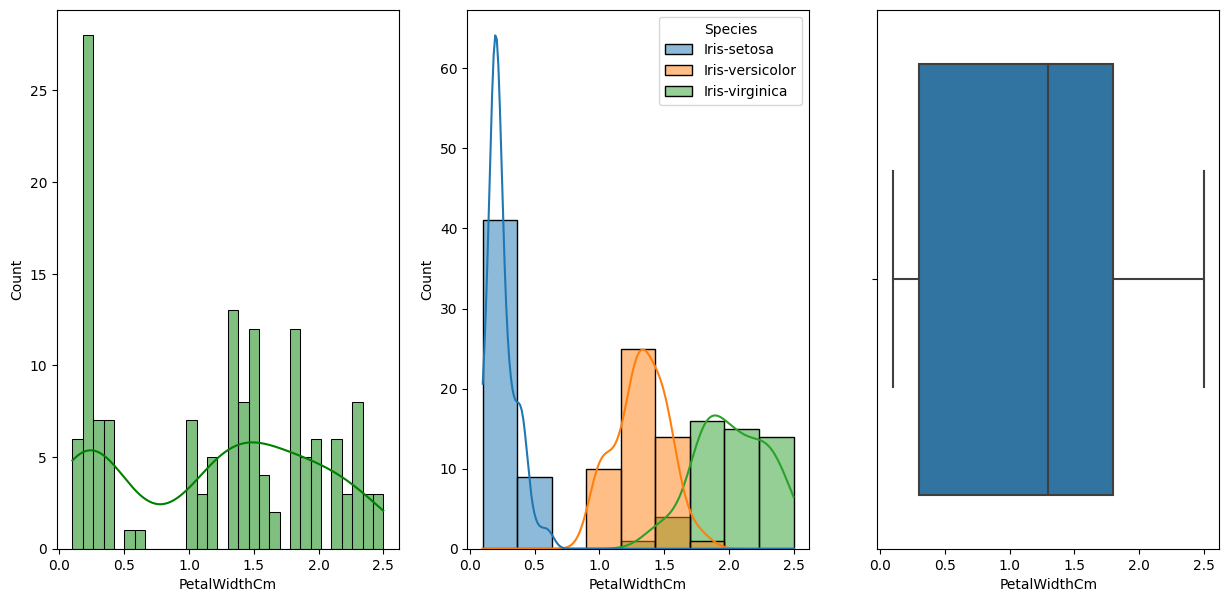

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
plt.subplot(131)
sns.histplot(data=df,x='PetalWidthCm',bins=30,kde=True,color='g')
plt.subplot(132)
sns.histplot(data=df,x='PetalWidthCm',kde=True,hue='Species')
plt.subplot(133)
sns.boxplot(data=df, x='PetalWidthCm',orient='v')
plt.show()

 **There is No outlier.**

In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Converting Categorical to Numerical.

In [ ]:
df['Species']=df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [ ]:
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


## **Splitting the Features and Target**

In [ ]:
X=df.drop(columns='Species', axis=1)
Y=df['Species']

In [ ]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## **Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify = Y, random_state=3)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (100, 4) (50, 4)


## **Standardization**

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.536998,2.120367,-1.404972,-1.037172
1,0.723560,-0.623637,1.078127,1.350180
2,-1.041221,1.122547,-1.404972,-1.169802
3,0.219337,-2.120367,0.154183,-0.241388
4,1.732007,0.374182,1.309113,0.819657
...,...,...,...,...
95,-1.041221,0.873092,-1.289479,-1.302433
96,-0.663054,1.621457,-1.289479,-1.302433
97,-1.293333,-0.124727,-1.347225,-1.169802
98,-0.158830,-1.372002,0.731648,1.084919


In [ ]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.032775,-0.873092,0.096437,0.023874
1,0.345393,-0.623637,0.154183,0.156504
2,0.597505,-0.873092,0.673901,0.819657
3,0.597505,-1.870912,0.385169,0.156504
4,0.345393,-1.122547,1.078127,0.289135
5,1.101728,-0.124727,0.731648,0.687027
6,-1.041221,1.122547,-1.231732,-0.771910
7,1.101728,0.124727,0.558408,0.421766
8,-0.915165,1.870912,-1.058493,-1.037172
9,-1.797556,-0.374182,-1.347225,-1.302433


## **Model Selection and Training**

In [ ]:
# Define the list of models and their names
models= [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier()]
model_names = ['Logistic Regression', 'SVM', 'K-Nearest Neighbors', 'Random Forest', 'Decision Tree']

In [ ]:
# Initialize empty lists to store model names and their corresponding accuracy scores
model_accuracy_dict = {'Model': [], 'Accuracy': []}

In [ ]:
# Loop through each model, train, and evaluate it
for model, model_name in zip(models, model_names):

    # training the model
    model.fit(X_train, Y_train)

    # evaluating the model
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, y_pred)

    model_accuracy_dict['Model'].append(model_name)
    model_accuracy_dict['Accuracy'].append(accuracy)

    print('Accuracy score of the', model_name, ' = ', accuracy)
    print('--------------------------------------------------')
    print('Classification report:', classification_report(Y_test, y_pred))
    print('Confusion matrix:\n', confusion_matrix(Y_test, y_pred))

Accuracy score of the Logistic Regression  =  0.92
--------------------------------------------------
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.88      0.88      0.88        16
           2       0.88      0.88      0.88        17

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50

Confusion matrix:
 [[17  0  0]
 [ 0 14  2]
 [ 0  2 15]]
Accuracy score of the SVM  =  0.96
--------------------------------------------------
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.88      0.93        16
           2       0.89      1.00      0.94        17

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
wei

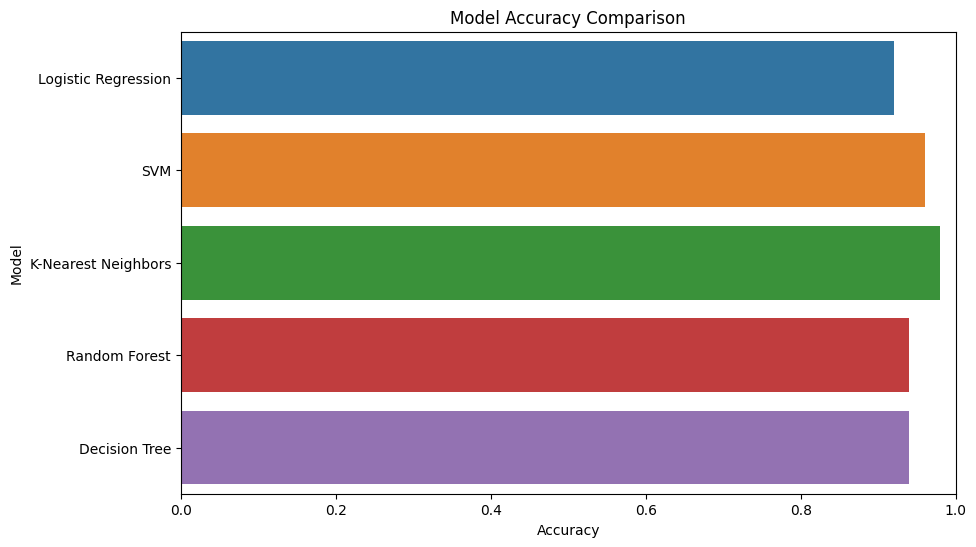

In [ ]:
# now,Create a DataFrame to store model names and accuracy scores
import pandas as pd
model_accuracy_df = pd.DataFrame(model_accuracy_dict)

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=model_accuracy_df)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Set the x-axis limit to better visualize accuracy differences
plt.show()


## **Conclusion:Out of all the different machine learning models we tested, the K-Nearest Neighbors (KNN) model performed the best in terms of accuracy 98%**